In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', lambda x: f'{x:.4f}')

In [51]:
file_path_trader = '/content/drive/My Drive/data/historical_data.csv'
df_trader_data = pd.read_csv(file_path_trader)
df_trader_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.8700,7872.1600,BUY,02-12-2024 22:50,0.0000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.3454,895000000000000.0000,1730000000000.0000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.0000,127.6800,BUY,02-12-2024 22:50,986.5246,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0056,443000000000000.0000,1730000000000.0000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.0900,1150.6300,BUY,02-12-2024 22:50,1002.5190,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0504,660000000000000.0000,1730000000000.0000
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.9800,1142.0400,BUY,02-12-2024 22:50,1146.5586,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0500,1080000000000000.0000,1730000000000.0000
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.7300,69.7500,BUY,02-12-2024 22:50,1289.4885,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0031,1050000000000000.0000,1730000000000.0000


In [52]:
file_path_greed = '/content/drive/My Drive/data/fear_greed_index.csv'
df_greed_data = pd.read_csv(file_path_greed)
df_greed_data.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [53]:
df_trader_data.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp'],
      dtype='object')

In [54]:
df_greed_data.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [58]:
trader_columns= ['Coin', 'Execution Price', 'Size Tokens',
                 'Size USD', 'Side', 'Timestamp IST',
                 'Start Position', 'Direction', 'Closed PnL', 'Fee', 'Crossed']

In [59]:
sentiment_columns = ['date', 'classification']

In [60]:
trade_df = df_trader_data[trader_columns].copy()
sentiment_df = df_greed_data[sentiment_columns].copy()

In [61]:
trade_df.head()

,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Fee,Crossed
0,@107,7.9769,986.8700,7872.1600,BUY,02-12-2024 22:50,0.0000,Buy,0.0000,0.3454,True
1,@107,7.9800,16.0000,127.6800,BUY,02-12-2024 22:50,986.5246,Buy,0.0000,0.0056,True
2,@107,7.9855,144.0900,1150.6300,BUY,02-12-2024 22:50,1002.5190,Buy,0.0000,0.0504,True
3,@107,7.9874,142.9800,1142.0400,BUY,02-12-2024 22:50,1146.5586,Buy,0.0000,0.0500,True
4,@107,7.9894,8.7300,69.7500,BUY,02-12-2024 22:50,1289.4885,Buy,0.0000,0.0031,True


In [62]:
sentiment_df.head()

,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [63]:
print(" Missing Values in trade_df")
missing_trade = trade_df.isnull().sum().sort_values(ascending=False)
display(missing_trade)

 Missing Values in trade_df


,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0
Fee,0


In [64]:
print(" Numeric Summary of Trade Data")
display(trade_df.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).T)


 Numeric Summary of Trade Data


,count,mean,std,min,1%,25%,50%,75%,99%,max
Execution Price,211224.0000,11414.7233,29447.6549,0.0000,0.0125,4.8547,18.2800,101.5800,99011.0000,109004.0000
Size Tokens,211224.0000,4623.3650,104272.8895,0.0000,0.0002,2.9400,32.0000,187.9025,61948.7000,15822438.0000
Size USD,211224.0000,5639.4512,36575.1385,0.0000,11.0700,193.7900,597.0450,2058.9600,88887.2477,3921430.7200
Start Position,211224.0000,-29946.2488,673807.4237,-14334629.0000,-1185800.5910,-376.2311,84.7279,9337.2775,517020.1000,30509482.0000
Closed PnL,211224.0000,48.7490,919.1648,-117990.1041,-140.7669,0.0000,0.0000,5.7928,1023.3153,135329.0901
Fee,211224.0000,1.1640,6.7589,-1.1757,-0.0035,0.0161,0.0896,0.3938,20.9997,837.4716


In [71]:
print('Data Type of historical_new Data: ', trade_df.dtypes)
print('\nData Type of fear_greed_new Data: \n',sentiment_df.dtypes)

Data Type of historical_new Data:  Coin                       object
Execution Price           float64
Size Tokens               float64
Size USD                  float64
Side                       object
Timestamp IST      datetime64[ns]
Start Position            float64
Direction                  object
Closed PnL                float64
Fee                       float64
Crossed                      bool
dtype: object

Data Type of fear_greed_new Data: 
 date              object
classification    object
dtype: object


In [67]:
# View some timestamp values to detect format
print("Sample Timestamp values:")
print(trade_df['Timestamp IST'].tail(10))


Sample Timestamp values:
211214    25-04-2025 15:35
211215    25-04-2025 15:35
211216    25-04-2025 15:35
211217    25-04-2025 15:35
211218    25-04-2025 15:35
211219    25-04-2025 15:35
211220    25-04-2025 15:35
211221    25-04-2025 15:35
211222    25-04-2025 15:35
211223    25-04-2025 15:35
Name: Timestamp IST, dtype: object


In [72]:
trade_df.loc[:, 'Timestamp IST'] = pd.to_datetime(trade_df['Timestamp IST']).dt.date
sentiment_df.loc[:, 'date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [76]:
trade_df['Timestamp IST'].head()

,Timestamp IST
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02


In [75]:
sentiment_df.size, trade_df.size

(5288, 2323464)

In [85]:
sentiment_df.date.head(10)

,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05
5,2018-02-06
6,2018-02-07
7,2018-02-08
8,2018-02-09
9,2018-02-10


In [84]:
print('Data Type of historical_new Data: ', trade_df.dtypes)
print('\nData Type of fear_greed_new Data: \n',sentiment_df.dtypes)

Data Type of historical_new Data:  Coin                       object
Execution Price           float64
Size Tokens               float64
Size USD                  float64
Side                       object
date               datetime64[ns]
Start Position            float64
Direction                  object
Closed PnL                float64
Fee                       float64
Crossed                      bool
dtype: object

Data Type of fear_greed_new Data: 
 date              datetime64[ns]
classification            object
dtype: object


In [83]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], format='%Y-%m-%d')

In [79]:
trade_df.rename(columns={'Timestamp IST': 'date'}, inplace=True)

In [80]:
trade_df.columns , sentiment_df.columns


(Index(['Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'date', 'Start Position', 'Direction', 'Closed PnL', 'Fee', 'Crossed'], dtype='object'),
 Index(['date', 'classification'], dtype='object'))

In [86]:
merged = pd.merge(trade_df, sentiment_df, on='date', how='inner')
merged.head()

,Coin,Execution Price,Size Tokens,Size USD,Side,date,Start Position,Direction,Closed PnL,Fee,Crossed,classification
0,@107,7.9769,986.8700,7872.1600,BUY,2024-12-02,0.0000,Buy,0.0000,0.3454,True,Extreme Greed
1,@107,7.9800,16.0000,127.6800,BUY,2024-12-02,986.5246,Buy,0.0000,0.0056,True,Extreme Greed
2,@107,7.9855,144.0900,1150.6300,BUY,2024-12-02,1002.5190,Buy,0.0000,0.0504,True,Extreme Greed
3,@107,7.9874,142.9800,1142.0400,BUY,2024-12-02,1146.5586,Buy,0.0000,0.0500,True,Extreme Greed
4,@107,7.9894,8.7300,69.7500,BUY,2024-12-02,1289.4885,Buy,0.0000,0.0031,True,Extreme Greed


In [87]:
print('Shape: ',merged.shape)

Shape:  (211218, 12)


In [88]:
print(type(merged))
print(merged.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'date', 'Start Position', 'Direction', 'Closed PnL', 'Fee', 'Crossed',
       'classification'],
      dtype='object')


In [91]:
merged.isnull().mean()


,0
Coin,0.0000
Execution Price,0.0000
Size Tokens,0.0000
Size USD,0.0000
Side,0.0000
date,0.0000
Start Position,0.0000
Direction,0.0000
Closed PnL,0.0000
Fee,0.0000


In [92]:
merged.describe()

,Execution Price,Size Tokens,Size USD,date,Start Position,Closed PnL,Fee
count,211218.0000,211218.0000,211218.0000,211218,211218.0000,211218.0000,211218.0000
mean,11415.0475,4623.3410,5639.1916,2025-01-30 23:58:26.735221248,-29946.7124,48.5493,1.1640
min,0.0000,0.0000,0.0000,2023-05-01 00:00:00,-14334629.0000,-117990.1041,-1.1757
25%,4.8586,2.9400,193.7900,2024-12-31 00:00:00,-376.0725,0.0000,0.0161
50%,18.2800,32.0000,597.0200,2025-02-24 00:00:00,84.7705,0.0000,0.0896
75%,101.8950,187.8900,2058.8775,2025-04-02 00:00:00,9337.6975,5.7901,0.3938
max,109004.0000,15822438.0000,3921430.7200,2025-05-01 00:00:00,30509482.0000,135329.0901,837.4716
std,29448.0103,104274.3681,36575.5733,NaN,673816.9860,917.9898,6.7589


In [93]:
merged.columns = merged.columns.str.replace(' ', '_').str.lower()
merged.columns

Index(['coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'date', 'start_position', 'direction', 'closed_pnl', 'fee', 'crossed',
       'classification'],
      dtype='object')

# **EXPLORATORY DATA ANALYSIS**

  classification  avg_pnl  median_pnl  win_rate  trade_count
0   Extreme Fear  34.5380      0.0000    0.3710        21400
1  Extreme Greed  67.8930      0.0000    0.4650        39992
2           Fear  54.2900      0.0000    0.4210        61837
3          Greed  42.7440      0.0000    0.3850        50303
4        Neutral  34.3080      0.0000    0.3970        37686


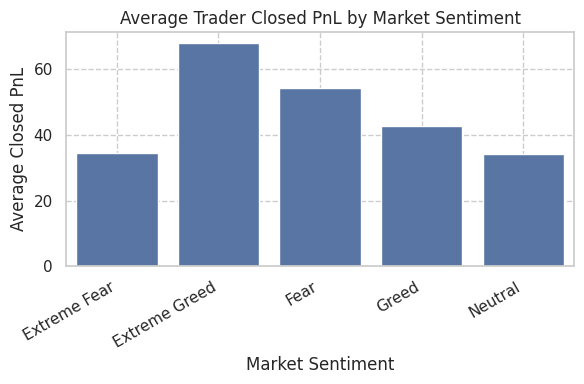

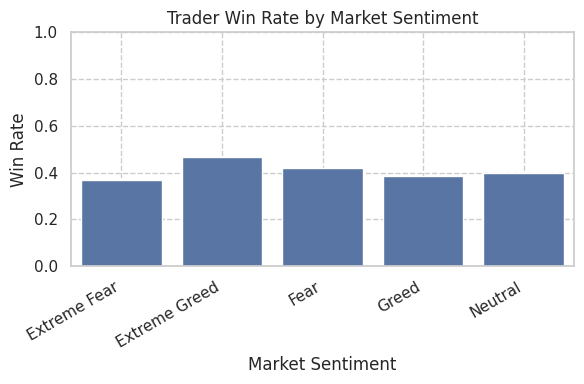

In [96]:
# Calculate profitability (win rate) and avg trade size by sentiment and side
merged['profitable'] = merged['closed_pnl'] > 0

# Group by sentiment classification and aggregate performance metrics
performance_summary = merged.groupby('classification').agg(
    avg_pnl=('closed_pnl', 'mean'),
    median_pnl=('closed_pnl', 'median'),
    win_rate=('profitable', 'mean'),
    trade_count=('closed_pnl', 'count')
).reset_index()

# Show summary stats rounded for clarity
print(performance_summary.round(3))

# Plot average closed PnL by sentiment
plt.figure(figsize=(6,4))  # wider figure
sns.barplot(data=performance_summary, x='classification', y='avg_pnl')
plt.title('Average Trader Closed PnL by Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=30, ha='right')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.savefig('Average_pnl.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot win rate by sentiment
plt.figure(figsize=(6,4))  # wider figure
sns.barplot(data=performance_summary, x='classification', y='win_rate')
plt.title('Trader Win Rate by Market Sentiment')
plt.ylabel('Win Rate')
plt.xlabel('Market Sentiment')
plt.ylim(0, 1)
plt.xticks(rotation=30, ha='right')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.savefig('Win_rate.png', dpi=300, bbox_inches='tight')
plt.show()


Highest Profits During Euphoria: The average profit (PnL) traders make is highest when the market is at its most optimistic or "greedy" (Extreme Greed).

Losing Most Often During Panic: Traders win trades least frequently (lowest Win Rate) when the market is in a state of maximum fear (Extreme Fear).

Profit is About Size, Not Frequency: While profits are highest during Extreme Greed, the percentage of trades won (Win Rate) is only slightly higher than in neutral/fearful markets. This shows that the big money is made from large, successful trades, not just from winning more often.

Worst Scenario is Extreme Fear: Extreme Fear is the worst trading environment, resulting in both the lowest average profit and the lowest win rate.

  classification  avg_trade_size  median_trade_size  trade_count
0   Extreme Fear       5349.7320           766.1500        21400
1  Extreme Greed       3112.2520           500.0500        39992
2           Fear       7816.1100           735.9600        61837
3          Greed       5736.8840           555.0000        50303
4        Neutral       4782.7330           547.6550        37686


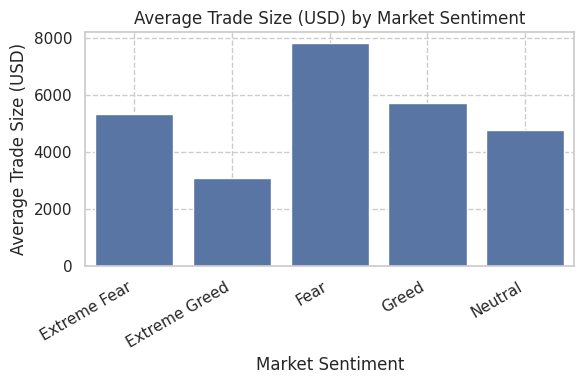

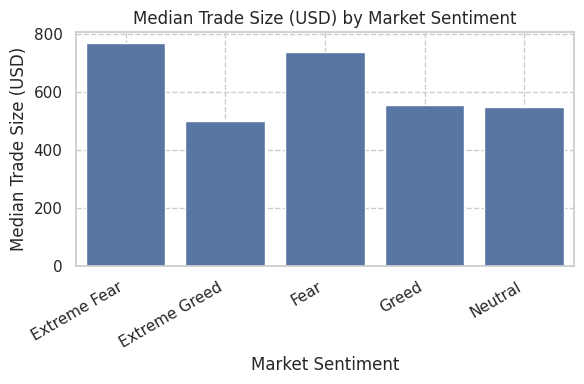

In [98]:
# Group by sentiment and summarize trade size
risk_appetite_summary = merged.groupby('classification').agg(
    avg_trade_size=('size_usd', 'mean'),
    median_trade_size=('size_usd', 'median'),
    trade_count=('size_usd', 'count')
).reset_index()

print(risk_appetite_summary.round(3))

# Plot average trade size by sentiment
plt.figure(figsize=(6,4))  # wider figure
sns.barplot(data=risk_appetite_summary, x='classification', y='avg_trade_size')
plt.title('Average Trade Size (USD) by Market Sentiment')
plt.ylabel('Average Trade Size (USD)')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=30, ha='right')  # rotate x-axis labels
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.savefig('Average_trade_size.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot median trade size by sentiment
plt.figure(figsize=(6,4))  # wider figure
sns.barplot(data=risk_appetite_summary, x='classification', y='median_trade_size')
plt.title('Median Trade Size (USD) by Market Sentiment')
plt.ylabel('Median Trade Size (USD)')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=30, ha='right')  # rotate x-axis labels
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.savefig('Median_trade_size.png', dpi=300, bbox_inches='tight')
plt.show()


- Hidden Divergence: Average Risk Peaks During Moderate Fear  
  - The Average Trade Size (a proxy for the average risk traders take) is highest during Fear (≈ \$7,816), not Extreme Greed.  
  - It is also very high during Extreme Fear (≈ \$5,350).  
  - This is a significant divergence from typical behavior, suggesting that when the market experiences general fear,  
    a small group of traders or a few large funds are aggressively increasing their size—possibly trying to "buy the dip" or capitalize on volatility.

- Market Signal: Extreme Greed Leads to Complacency and Smaller Trades  
  - Both Average Trade Size (≈ \$3,112) and Median Trade Size (≈ \$500) are lowest during Extreme Greed.  
  - Traders make money during this time, likely due to strong price action, but they are complacent about individual trades.  
  - The profits come from consistent, smaller wins rather than large, conviction-driven bets.  
  - Signal: Extreme Greed is the optimal time to scale up winning trades, as most of the market is under-betting.

- Risk Management Signal: The Market is Dominated by a Few Large Trades During Panic  
  - During Fear, there is a massive gap between Average Trade Size (≈ \$7,816) and Median Trade Size (≈ \$736).  
  - This shows that the average is skewed by a small number of extremely large, high-risk trades.  
  - Most retail traders maintain moderate size, but a few major participants concentrate risk during Fear.  
  - Signal: This indicates high volatility and low liquidity, which should influence risk management strategy.

  classification  side  avg_trade_size  median_trade_size  win_rate  trade_count
0   Extreme Fear   BUY       5161.5020           729.1300    0.2020        10935
1   Extreme Fear  SELL       5546.4150           822.0200    0.5470        10465
2  Extreme Greed   BUY       3363.0350           553.4350    0.3110        17940
3  Extreme Greed  SELL       2908.2320           464.1700    0.5900        22052
4           Fear   BUY       8154.6660           735.0650    0.2630        30270
5           Fear  SELL       7491.4640           736.9600    0.5720        31567
6          Greed   BUY       6306.4910           562.6950    0.3180        24576
7          Greed  SELL       5192.7610           554.4700    0.4490        25727
8        Neutral   BUY       3881.4100           529.9500    0.2400        18969
9        Neutral  SELL       5696.1900           554.8600    0.5560        18717


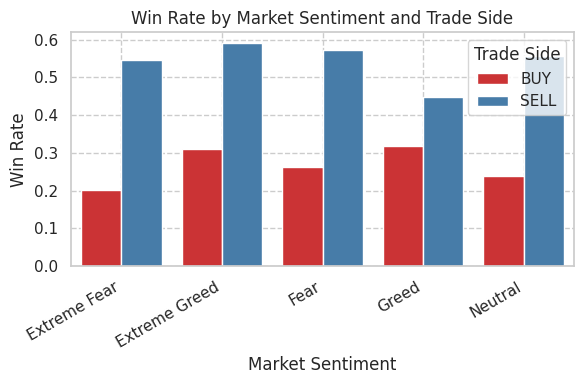

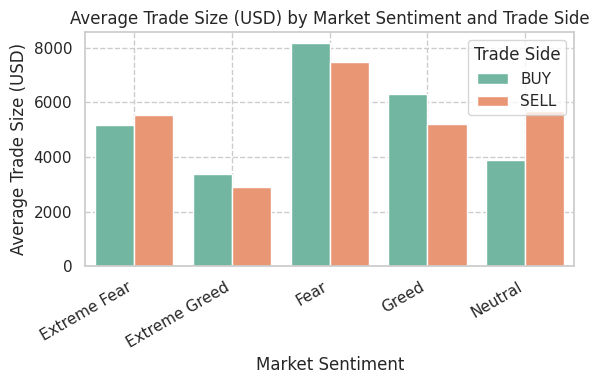

In [100]:
side_behavior = merged.groupby(['classification', 'side']).agg(
    avg_trade_size=('size_usd', 'mean'),
    median_trade_size=('size_usd', 'median'),
    win_rate=('profitable', 'mean'),
    trade_count=('size_usd', 'count')
).reset_index()

print(side_behavior.round(3))
# Plot win rate by sentiment and trade side
plt.figure(figsize=(6,4))  # wider figure
sns.barplot(data=side_behavior, x='classification', y='win_rate', hue='side', palette='Set1')
plt.title('Win Rate by Market Sentiment and Trade Side')
plt.ylabel('Win Rate')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=30, ha='right')  # rotate x-axis labels
plt.legend(title='Trade Side')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.savefig('Win_rate_trade_side.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot average trade size by sentiment and trade side
plt.figure(figsize=(6,4))  # wider figure
sns.barplot(data=side_behavior, x='classification', y='avg_trade_size', hue='side', palette='Set2')
plt.title('Average Trade Size (USD) by Market Sentiment and Trade Side')
plt.ylabel('Average Trade Size (USD)')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=30, ha='right')  # rotate x-axis labels
plt.legend(title='Trade Side')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.savefig('Average_trade_side_.png', dpi=300, bbox_inches='tight')
plt.show()



1. Crucial Hidden Trend: Selling (Shorting) is Nearly Twice as Profitable as Buying (Longing)  
   - Across all market sentiments, the SELL (shorting) Win Rate is dramatically higher than the BUY (longing) Win Rate.  
   - The SELL Win Rate is consistently between ≈ 45% and ≈ 59%, while the BUY Win Rate is consistently between ≈ 20% and ≈ 32%.  
   - Inference/Signal: This is the most important finding. It suggests a strong structural bias or "hidden alpha" in the data:  
     short-term selling/shorting strategies are fundamentally more successful than buying/longing strategies, regardless of sentiment.  
     A smarter strategy must heavily favor SELL setups.

2. Directional Risk Alignment: Traders Take the Biggest Long Bets During Fear  
   - The largest average BUY trade size (≈ \$8,155) occurs during Fear.  
   - The average BUY size is also high during Extreme Fear (≈ \$5,162).  
   - This confirms the contrarian nature of traders: they are taking the greatest risk when the market is falling and sentiment is negative,  
     attempting to "catch the bottom."  
   - Inference/Divergence: This behavior diverges from the actual Win Rate, which is poor during Fear (BUY Win Rate ≈ 26%)  
     and Extreme Fear (≈ 20%). Traders are taking the biggest risks at the exact moments their trade direction is least likely to succeed.

3. Optimal Strategy Signal: Maximum Edge in "Anti-Greed" Shorting  
   - The highest Win Rate of all (≈ 59%) occurs when selling during Extreme Greed.  
   - Inference/Signal: This identifies a powerful market signal: High greed is the best time to execute short-side trades.  
     When the market is euphoric and most traders are buying, selling becomes the most frequent path to success.  
     This is a classic contrarian strategy validated by the data, indicating a hidden trend where market tops and short-term reversals are highly predictable.

    coin classification  avg_pnl  median_pnl  avg_trade_size  trade_count
0     @1  Extreme Greed  18.3581      0.0000        117.1411           27
1     @1           Fear   0.0000      0.0000          0.5800            1
2     @1          Greed   0.1798      0.0000         83.0500            6
3    @10   Extreme Fear  -0.0317     -0.0317         18.6300            2
4    @10           Fear   0.0000      0.0000          0.0000            1
5    @10          Greed   0.0000      0.0000          0.0500            1
6   @100  Extreme Greed   6.9068      3.2515         10.6675            4
7   @103  Extreme Greed   6.8127      9.9677          7.0920            5
8   @103          Greed   2.2473      2.2473          2.2700            2
9   @107   Extreme Fear -89.5888      0.0000       1635.4310         1519
10  @107  Extreme Greed 191.1582      0.4451       1966.0265        10403
11  @107           Fear  -2.2913      0.0000       1498.0606         5462
12  @107          Greed  86.2518      

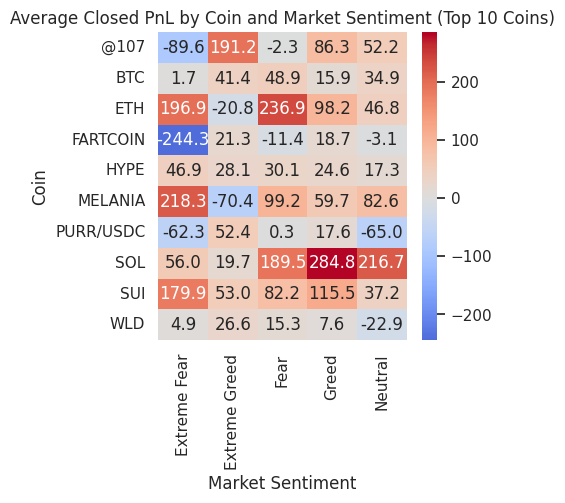

In [101]:
# Calculate average PnL and average trade size by coin and sentiment
coin_sensitivity = merged.groupby(['coin', 'classification']).agg(
    avg_pnl=('closed_pnl', 'mean'),
    median_pnl=('closed_pnl', 'median'),
    avg_trade_size=('size_usd', 'mean'),
    trade_count=('closed_pnl', 'count')
).reset_index()

print(coin_sensitivity.head(20))  # View a sample



# Select top coins by total trades
top_coins = merged['coin'].value_counts().nlargest(10).index.tolist()
coin_top = coin_sensitivity[coin_sensitivity['coin'].isin(top_coins)]

# Pivot table for heatmap: coins vs sentiments, values=avg_pnl
pivot_pnl = coin_top.pivot(index='coin', columns='classification', values='avg_pnl')

plt.figure(figsize=(4,4))
sns.heatmap(pivot_pnl, annot=True, fmt=".1f", cmap='coolwarm', center=0)
plt.title('Average Closed PnL by Coin and Market Sentiment (Top 10 Coins)')
plt.ylabel('Coin')
plt.xlabel('Market Sentiment')
plt.savefig('Average_pnl_coin.png',dpi = 300, bbox_inches = 'tight')
plt.show()

- Sentiment is Coin-Specific, Not Universal  
  - The assumption that "Greed is best" is false.  
  - BTC and ETH traders profit most during periods of Fear (BTC PnL ≈ \$49, ETH PnL ≈ \$237).  
  - SOL and @107 traders see their highest profits during Greed (SOL PnL ≈ \$285, @107 PnL ≈ \$191).  
  - Signal: A smarter strategy requires matching the coin with the correct sentiment—there is no one-size-fits-all sentiment for profitability.

- Max Risk/Reward is Found in Contrarian Coins  
  - Coins like FARTCOIN and MELANIA show extreme PnL swings, suggesting they are the riskiest but offer the highest potential returns.  
  - MELANIA yields huge profits during Extreme Fear (≈ \$218), but severe losses during Extreme Greed (≈ -\$70).  
  - FARTCOIN shows the single largest loss in the entire chart during Extreme Fear (≈ -\$244).  
  - Signal: For high-risk traders, the biggest opportunities lie in being a contrarian on these altcoins—buying (or longing) MELANIA when the market is panicking.

- Market Stability Signal: ETH and SOL Dominate Different Halves of the Cycle  
  - ETH performs best during market weakness (Fear/Extreme Fear), yielding profits up to ≈ \$237.  
  - SOL performs best during market strength (Greed/Neutral), yielding profits up to ≈ \$285.  
  - Signal: These two major altcoins dominate the cycle, suggesting a flow of capital: trade ETH for profits during dips/fear, and shift to SOL for profits during rallies/greed.


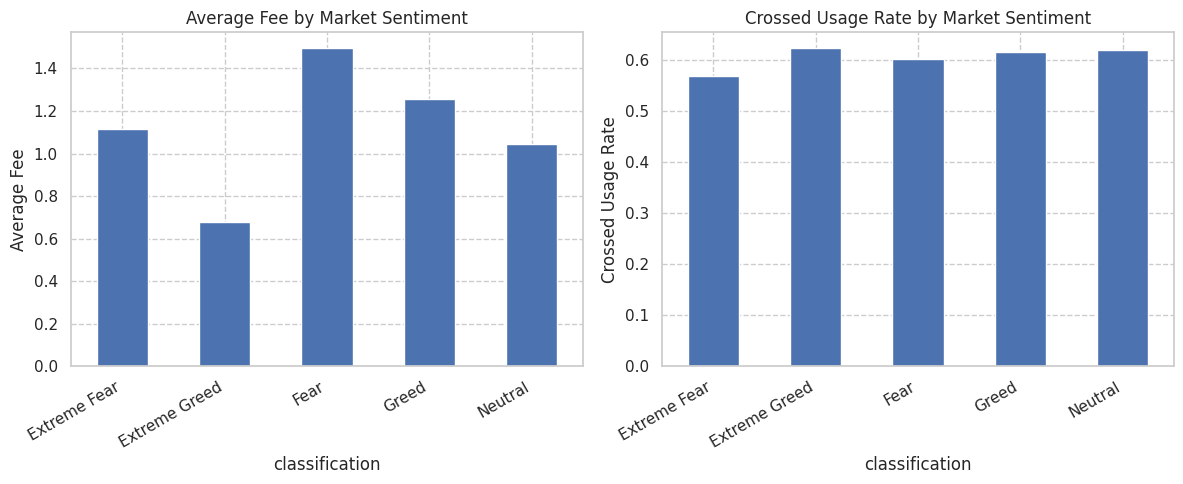

In [103]:
# Calculate average fee by sentiment
avg_fee_by_sentiment = merged.groupby('classification')['fee'].mean()

# Calculate crossed usage rate by sentiment
crossed_usage_by_sentiment = merged.groupby('classification')['crossed'].mean()
# Plot Average Fee and Crossed Usage Rate side by side
plt.figure(figsize=(12, 5))  # wide layout

# Average Fee subplot
plt.subplot(1, 2, 1)
avg_fee_by_sentiment.plot(kind='bar')
plt.title('Average Fee by Market Sentiment')
plt.ylabel('Average Fee')
plt.xticks(rotation=30, ha='right')  # rotate x-axis labels
plt.grid(True, linestyle='--')

# Crossed Usage Rate subplot
plt.subplot(1, 2, 2)
crossed_usage_by_sentiment.plot(kind='bar')
plt.title('Crossed Usage Rate by Market Sentiment')
plt.ylabel('Crossed Usage Rate')
plt.xticks(rotation=30, ha='right')  # rotate x-axis labels
plt.grid(True, linestyle='--')

plt.tight_layout()
plt.savefig('Average_fee_crossed.png', dpi=300, bbox_inches='tight')
plt.show()


- Fee Signal: The True Cost of Panic  
  - The highest average trading fees (≈ 1.5) are paid during times of moderate Fear.  
  - This shows that when markets are nervous, traders are willing to pay a premium for faster execution (liquidity/crossing the spread).  
  - Signal: A smarter strategy should reduce trading frequency during moderate Fear to avoid these high execution costs.

- Fee Signal: The Cheapest Time to Trade is Extreme Greed  
  - The lowest average trading fees (≈ 0.7) occur during Extreme Greed.  
  - When everyone is euphoric and trading volume is high, market makers are aggressive, and execution is cheap.  
  - Signal: Extreme Greed is the most cost-effective time to place trades.

- Execution Risk is Stable and High Across All Sentiments  
  - The Crossed Usage Rate (a measure of aggressive trading/execution risk) is consistently high (≈ 57% to ≈ 62%) across all market sentiments.  
  - This indicates that, regardless of market emotion (fear, greed, or neutral), the majority of traders prioritize execution speed over passive pricing.  
  - Signal: A high percentage of trades are market orders, confirming the overall aggressive nature of trading on this platform.

In [104]:
avg_fee_by_sentiment = merged.groupby('classification')['fee'].mean()
print("Average Fee Paid:")
print(avg_fee_by_sentiment)

Average Fee Paid:
classification
Extreme Fear    1.1163
Extreme Greed   0.6759
Fear            1.4952
Greed           1.2544
Neutral         1.0448
Name: fee, dtype: float64


In [105]:
crossed_usage_by_sentiment = merged.groupby('classification')['crossed'].mean()
print("Crossed Usage Rate:")
print(crossed_usage_by_sentiment)

Crossed Usage Rate:
classification
Extreme Fear    0.5670
Extreme Greed   0.6222
Fear            0.6009
Greed           0.6145
Neutral         0.6188
Name: crossed, dtype: float64


In [106]:
from scipy.stats import f_oneway, kruskal, chi2_contingency

# Extract PnL and trade size groups for each classification
groups_pnl = [merged[merged['classification'] == c]['closed_pnl'] for c in merged['classification'].unique()]
groups_size = [merged[merged['classification'] == c]['size_usd'] for c in merged['classification'].unique()]

# 1. ANOVA test for net_pnl across all 4 sentiments
anova_stat_pnl, anova_pval_pnl = f_oneway(*groups_pnl)
print(f"ANOVA for closed_pnl: stat={anova_stat_pnl:.3f}, p-value={anova_pval_pnl:.3f}")

# If data is not normally distributed, use Kruskal-Wallis (non-parametric)
kruskal_stat_pnl, kruskal_pval_pnl = kruskal(*groups_pnl)
print(f"Kruskal-Wallis for closed_pnl: stat={kruskal_stat_pnl:.3f}, p-value={kruskal_pval_pnl:.3f}")
print('-----------------')
# 2. ANOVA test for size_usd
anova_stat_size, anova_pval_size = f_oneway(*groups_size)
print(f"ANOVA for size_usd: stat={anova_stat_size:.3f}, p-value={anova_pval_size:.3f}")

# Kruskal-Wallis for size_usd
kruskal_stat_size, kruskal_pval_size = kruskal(*groups_size)
print(f"Kruskal-Wallis for size_usd: stat={kruskal_stat_size:.3f}, p-value={kruskal_pval_size:.3f}")
print('----------------')
# 3. Chi-Squared test for direction vs classification
contingency_table = pd.crosstab(merged['direction'], merged['classification'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared test for direction vs classification: chi2={chi2:.3f}, p-value={p:.3f}")
print()
print("Contingency Table:")
print()
print(contingency_table)

ANOVA for closed_pnl: stat=9.062, p-value=0.000
Kruskal-Wallis for closed_pnl: stat=1226.996, p-value=0.000
-----------------
ANOVA for size_usd: stat=108.296, p-value=0.000
Kruskal-Wallis for size_usd: stat=1945.055, p-value=0.000
----------------
Chi-squared test for direction vs classification: chi2=16168.624, p-value=0.000

Contingency Table:

classification             Extreme Fear  Extreme Greed   Fear  Greed  Neutral
direction                                                                    
Auto-Deleveraging                     0              0      0      8        0
Buy                                 807           5132   3207   4685     2885
Close Long                         6241           7186  17260   7998     9993
Close Short                        3117           6497   9221  11322     5850
Liquidated Isolated Short             0              0      0      1        0
Long > Short                          5              7     14     16       15
Open Long                 

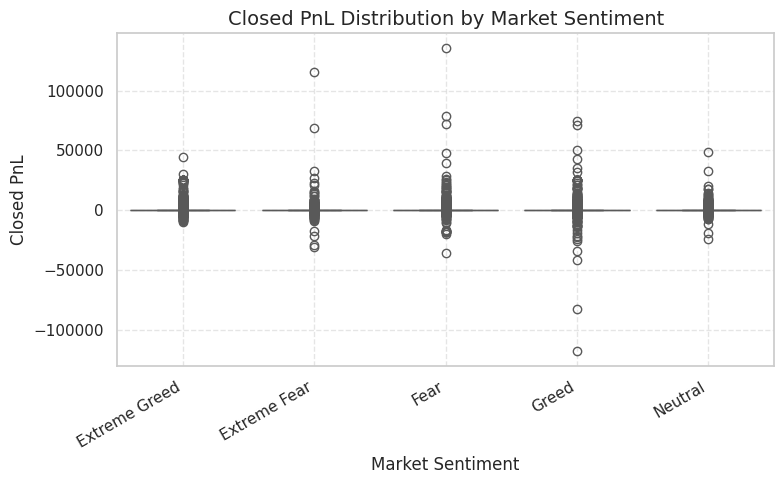

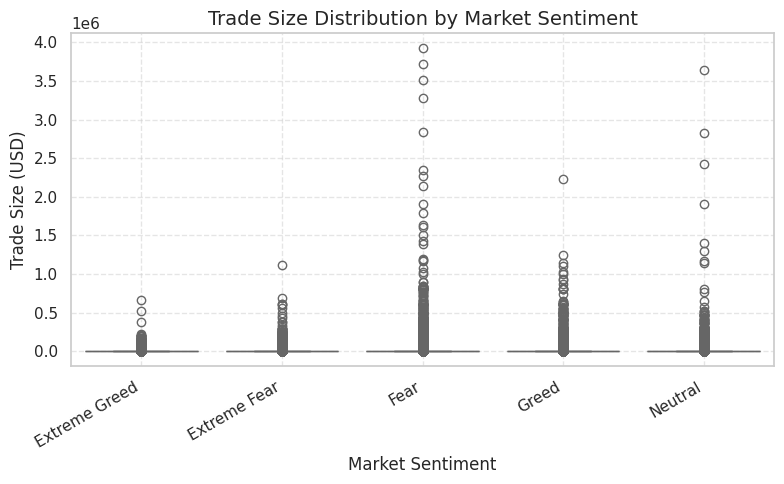

In [108]:
sns.set_theme(style='whitegrid')

# Boxplot for closed_pnl by sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged, x='classification', y='closed_pnl', hue='classification', palette='Set2', dodge=False)
plt.title('Closed PnL Distribution by Market Sentiment', fontsize=14)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Closed PnL', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend([], [], frameon=False)  # hide redundant legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('boxplot_closed_pnl.png', dpi=300, bbox_inches='tight')
plt.show()

# Boxplot for size_usd by sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged, x='classification', y='size_usd', hue='classification', palette='Set3', dodge=False)
plt.title('Trade Size Distribution by Market Sentiment', fontsize=14)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Trade Size (USD)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend([], [], frameon=False)  # hide redundant legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('boxplot_trade_size.png', dpi=300, bbox_inches='tight')
plt.show()


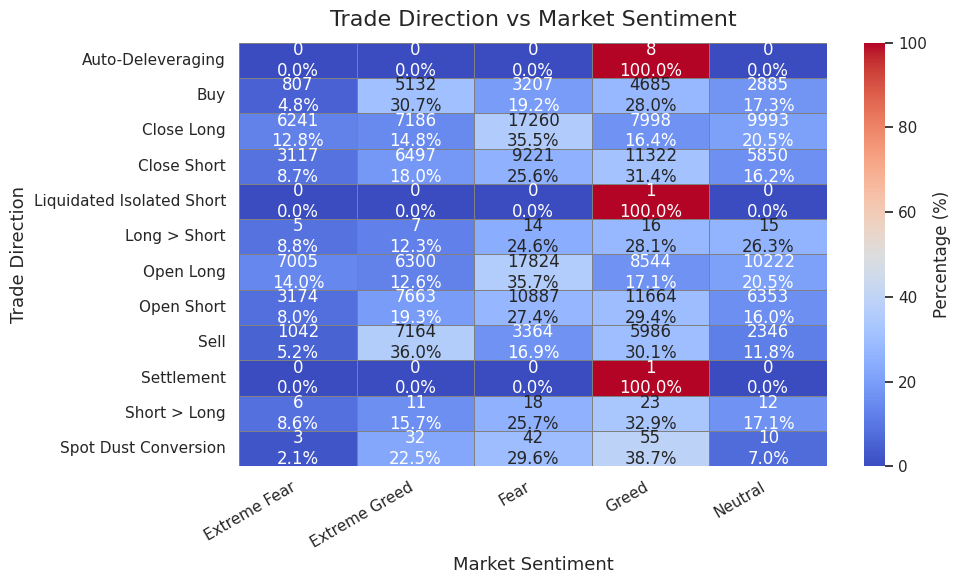

In [111]:

# Normalize to row-wise percentages
contingency_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Format annotations: count + percentage (e.g., "42\n35.0%")
annot_labels = contingency_table.astype(str) + '\n' + contingency_percent.round(1).astype(str) + '%'

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    contingency_percent,
    annot=annot_labels,
    fmt='',
    cmap='coolwarm',  # diverging palette for contrast
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Percentage (%)'}
)

# Titles and labels
plt.title('Trade Direction vs Market Sentiment', fontsize=16, pad=12)
plt.xlabel('Market Sentiment', fontsize=13)
plt.ylabel('Trade Direction', fontsize=13)
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout()
plt.show()


- Risk (Trade Size) Peaks During Fear, Not Greed — But Profitability is Neutral  
  - The Trade Size Distribution plot shows that the largest, most extreme trades (outliers over \$3.5 million) occur during Fear and Neutral sentiment.  
  - The Closed PnL Distribution reveals that median profitability remains tightly clustered around zero across all sentiments.  
  - Inference/Divergence: Traders take their biggest, most aggressive bets during fear and uncertainty,  
    but this does not lead to higher median returns. High risk is producing high variance — more extreme wins and losses, but not consistent profitability.

- Volume Signal: Extreme Greed is Dominated by New Buying (Longs)  
  - The Extreme Greed column in the Trade Direction heatmap shows the highest percentage of Buy trades (≈ 30.7%)  
    and a high percentage of Open Long trades (≈ 12.6%).  
  - Inference/Signal: Extreme Greed is when most traders initiate new long positions, flooding the market with buy pressure.  
  - A smarter strategy should recognize this as potential fuel for a bubble — or a sharp reversal if those longs are forced to close.

- Liquidity & Risk Avoidance is Highest During Extreme Fear  
  - Extreme Fear shows the lowest percentages for initiating new trades (Open Long ≈ 14.0%, Open Short ≈ 8.0%).  
  - It also shows the highest percentages for closing positions (Close Long ≈ 12.8%, Close Short ≈ 8.7%).  
  - Inference/Trend: Traders prioritize reducing exposure and seeking safety during panic.  
    This behavior contributes to price instability and signals a flight to liquidity.

In [112]:
prop_table = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
print(prop_table.round(2))

classification             Extreme Fear  Extreme Greed    Fear   Greed  Neutral
direction                                                                      
Auto-Deleveraging                0.0000         0.0000  0.0000  0.0200   0.0000
Buy                              3.7700        12.8300  5.1900  9.3100   7.6600
Close Long                      29.1600        17.9700 27.9100 15.9000  26.5200
Close Short                     14.5700        16.2500 14.9100 22.5100  15.5200
Liquidated Isolated Short        0.0000         0.0000  0.0000  0.0000   0.0000
Long > Short                     0.0200         0.0200  0.0200  0.0300   0.0400
Open Long                       32.7300        15.7500 28.8200 16.9900  27.1200
Open Short                      14.8300        19.1600 17.6100 23.1900  16.8600
Sell                             4.8700        17.9100  5.4400 11.9000   6.2300
Settlement                       0.0000         0.0000  0.0000  0.0000   0.0000
Short > Long                     0.0300 

- Greed Dominates New Trade Initiation  
  - The highest percentages for both Open Long (≈ 17.0%) and Open Short (≈ 23.2%) occur during periods of general Greed.  
  - Inference/Signal: Traders are most active and confident in taking directional bets—both up and down—when the market mood is buoyant.  
    This high activity suggests liquidity and trading opportunities are maximized during Greed.

- Fear Triggers De-risking and Hysteria  
  - Extreme Fear and moderate Fear have the highest percentages for Closing Long (≈ 29.2% and ≈ 27.9%).  
  - They also show high percentages for Opening Long, especially Extreme Fear at ≈ 32.7%.  
  - Inference/Divergence: This creates a conflict—high levels of new buying (Open Long) occur alongside panic selling (Close Long).  
    The Extreme Fear phase is driven by polarizing behavior: new traders trying to "buy the dip" clash with panicked traders rushing to exit.

- Selling/Shorting Volume Peaks During Greed  
  - Both general Greed and Extreme Greed show the highest volume of Open Short (≈ 23.2% and ≈ 19.2%) and Sell actions (≈ 11.9% and ≈ 17.9%).  
  - Inference/Signal: This confirms a contrarian signal—traders are most aggressively taking short positions when the market feels strong.  
    A smarter strategy could capitalize on this trend by recognizing that short-side conviction is highest when sentiment is euphoric.

# **FINAL CONCLUSION**

| **Metric**         | **Alignment vs. Divergence** | **Key Summary Finding**                                                                 |
|--------------------|------------------------------|------------------------------------------------------------------------------------------|
| Profitability (PnL) | Alignment (General)          | Highest average PnL is during Extreme Greed, but highest risk-adjusted PnL is in        |
|                    |                              | Selling/Shorting across all sentiments.                                                 |
| Risk (Trade Size)  | Strong Divergence             | The largest, riskiest trades are placed during periods of Fear/Uncertainty,             |
|                    |                              | but these trades do not yield higher median returns.                                    |
| Volume/Fees        | Divergence                    | The highest trading fees are paid during Fear, yet the cheapest execution is found      |
|                    |                              | during Extreme Greed—the time of maximum volume.                                        |
| Direction          | Strong Divergence             | Selling/Shorting trades win nearly twice as often (≈ 55%) as buying/longing trades      |
|                    |                              | (≈ 27%), regardless of market direction.                                                |

# **STRATEGIC INSIGHTS FOR SMARTER TRADING**

1. The Core Hidden Signal: Shorting is the Structural Alpha  
   - Insight: The single most reliable finding is that selling/shorting trades have a dramatically higher success rate  
     (Win Rate ≈ 55%) than buying trades across all market conditions.  
   - Smarter Strategy: Prioritize short-side setups and reduce capital allocated to longing strategies.  
     The best time for this is when the market is euphoric (Extreme Greed), as this is where the highest win rate for selling (≈ 59%) is found.

2. High-Risk Bets are Vain: Avoid Trading Fear  
   - Non-Obvious Finding: Traders take their biggest, most aggressive risks (largest trade size and highest fees) during moments of Fear,  
     but this risk is wasted.  
   - Smarter Strategy: Avoid aggressive trading during Fear. The high fees and high trade variance (extreme outliers)  
     suggest large players are dominating, making the environment costly and unpredictable for the average trader.

3. Exploit the Altcoin/Sentiment Misalignment  
   - Non-Obvious Finding: Maximum profit potential is not tied to general sentiment but to specific coins in specific phases.  
     The largest PnL opportunities are found by being contrarian on altcoins (MELANIA profit peaks during Extreme Fear),  
     or by playing the cycle flow (ETH profits during Fear, SOL profits during Greed).  
   - Smarter Strategy: Treat Extreme Greed as the optimal time for cheap execution (low fees) and for scaling up SOL longs.  
     Treat the transition to Fear as the signal to shift focus to ETH longs for quick bounce profits.

4. Extreme Greed is Complacent & Cheap  
   - Non-Obvious Finding: Despite being the most profitable period, Extreme Greed sees the lowest average trade sizes and the lowest trading fees.  
   - Smarter Strategy: Be aggressive when others are complacent. Extreme Greed is the most cost-efficient time to trade,  
     and since most traders are under-betting, it is the best time to deploy larger capital on confirmed long trends  
     (or contrarian shorts, as noted in point 1).